Housing information for Ames, Iowa

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import missingno as msno
from matplotlib.pyplot import figure

plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})

%pip install plotly
%pip install geopandas
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
house = pd.read_csv('housing.csv')
house

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [3]:
house.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [4]:
house.tail(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1445,1446,85,RL,70.0,8400,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,129000
1446,1447,20,RL,NaN,26142,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,157900
1447,1448,60,RL,80.0,10000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,WD,Normal,240000
1448,1449,50,RL,70.0,11767,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdWo,NaN,0,5,2007,WD,Normal,112000
1449,1450,180,RM,21.0,1533,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2006,WD,Abnorml,92000
1450,1451,90,RL,60.0,9000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2009,WD,Normal,136000
1451,1452,20,RL,78.0,9262,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2009,New,Partial,287090
1452,1453,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2006,WD,Normal,145000
1453,1454,20,RL,90.0,17217,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Abnorml,84500
1454,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,10,2009,WD,Normal,185000


In [5]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

<AxesSubplot:>

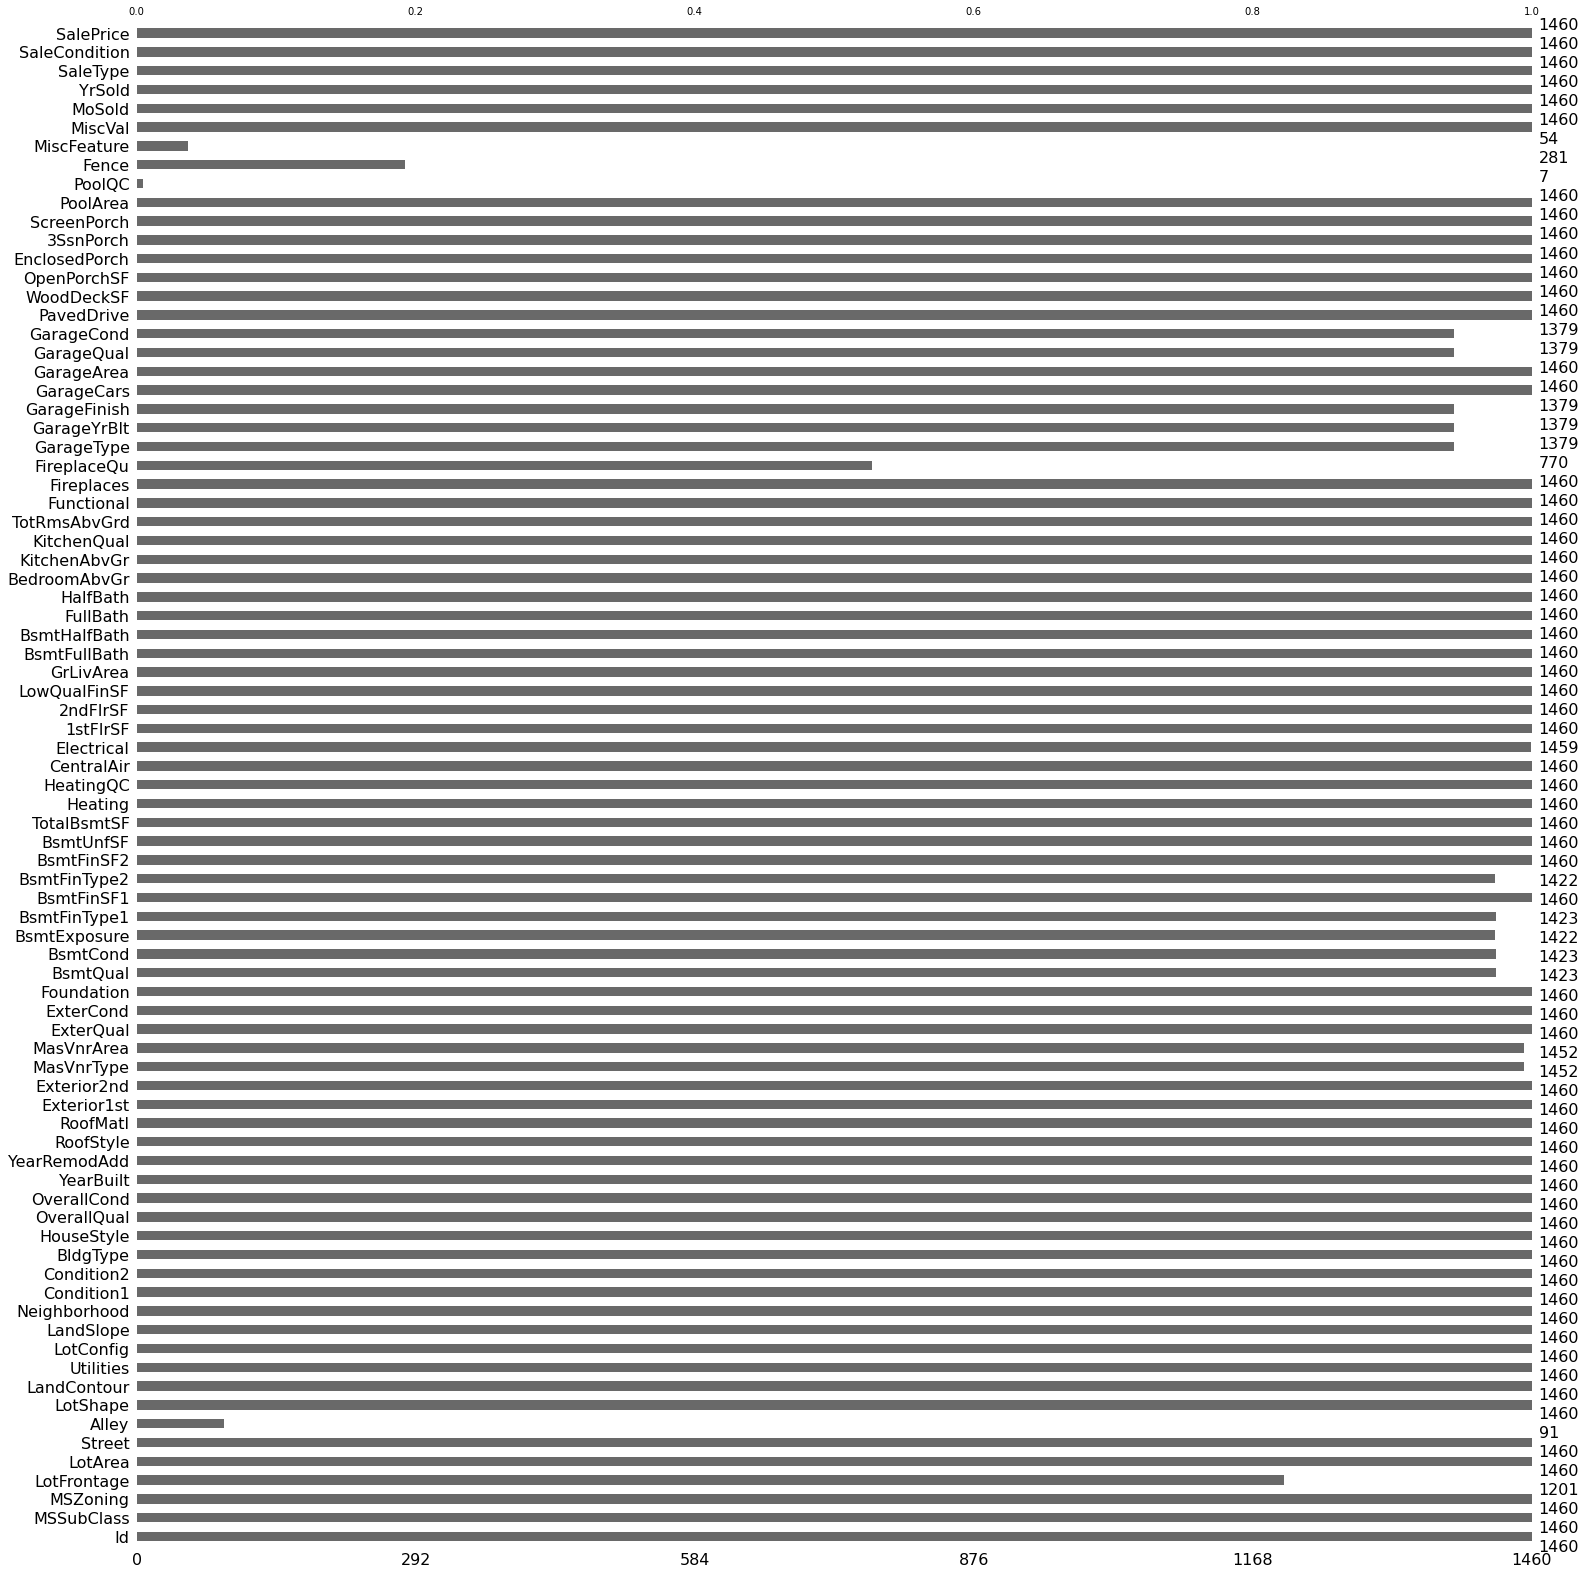

In [6]:
msno.bar(house)
#Here we created a visualization to observe the missing values and their patterns in our data file
#and observing this i see that there are some missing values.

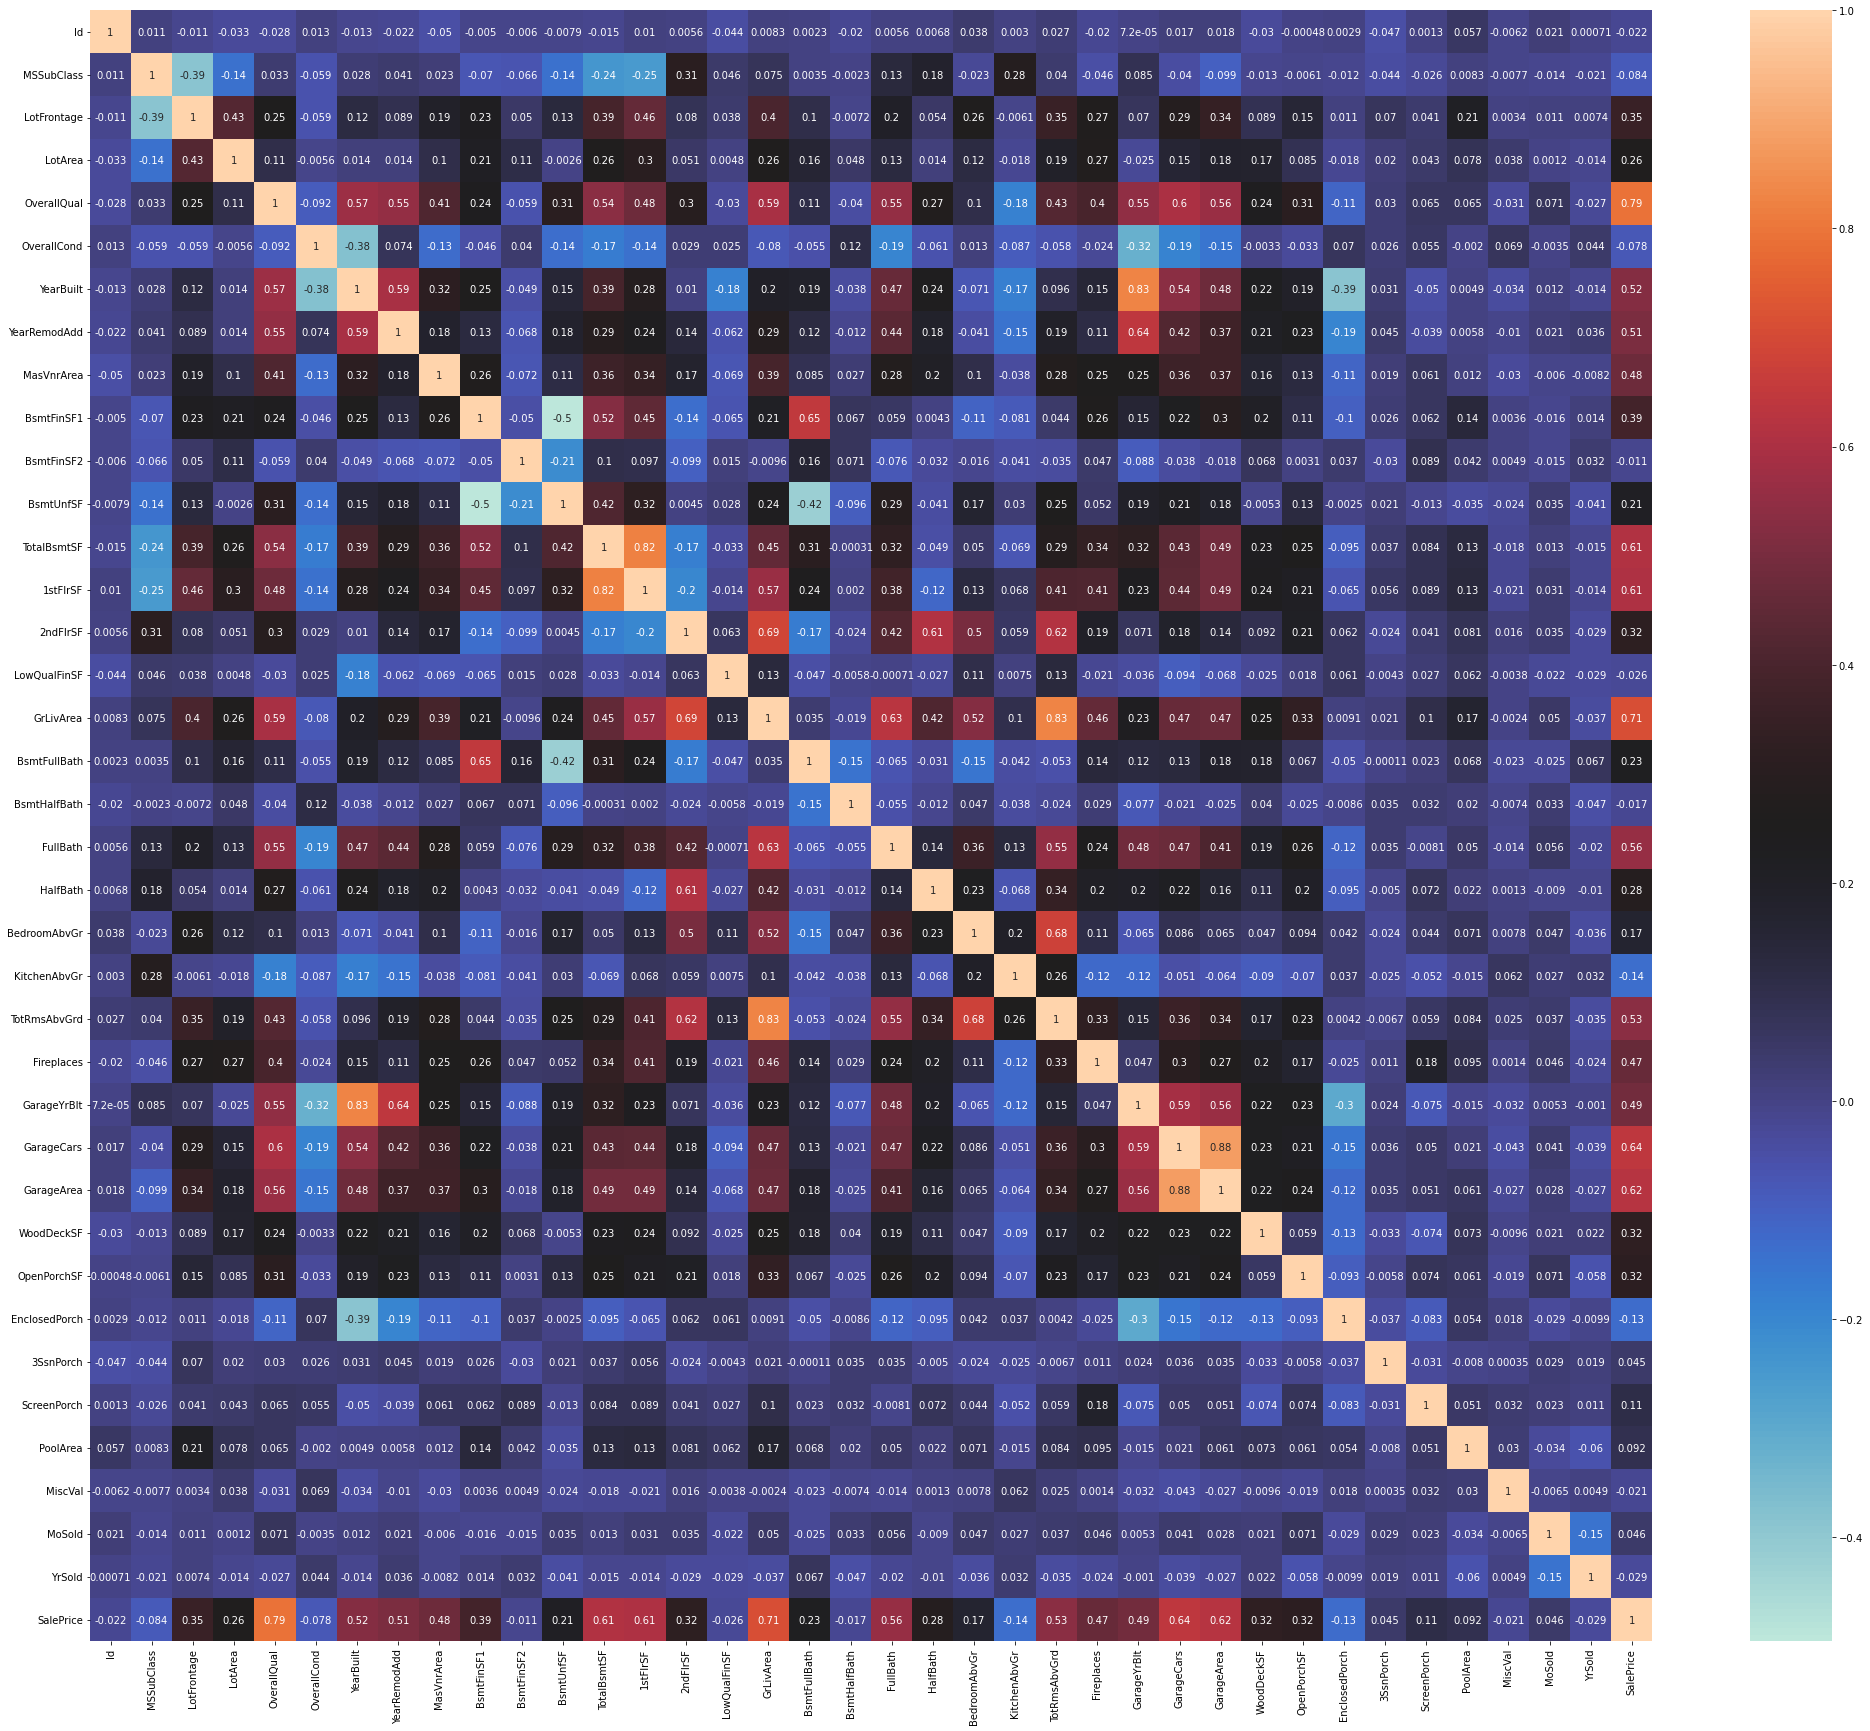

In [7]:
fig = plt.figure(figsize= (35,30))
sns.heatmap(house.corr(),cmap='icefire', annot=True)
plt.show()
#corr

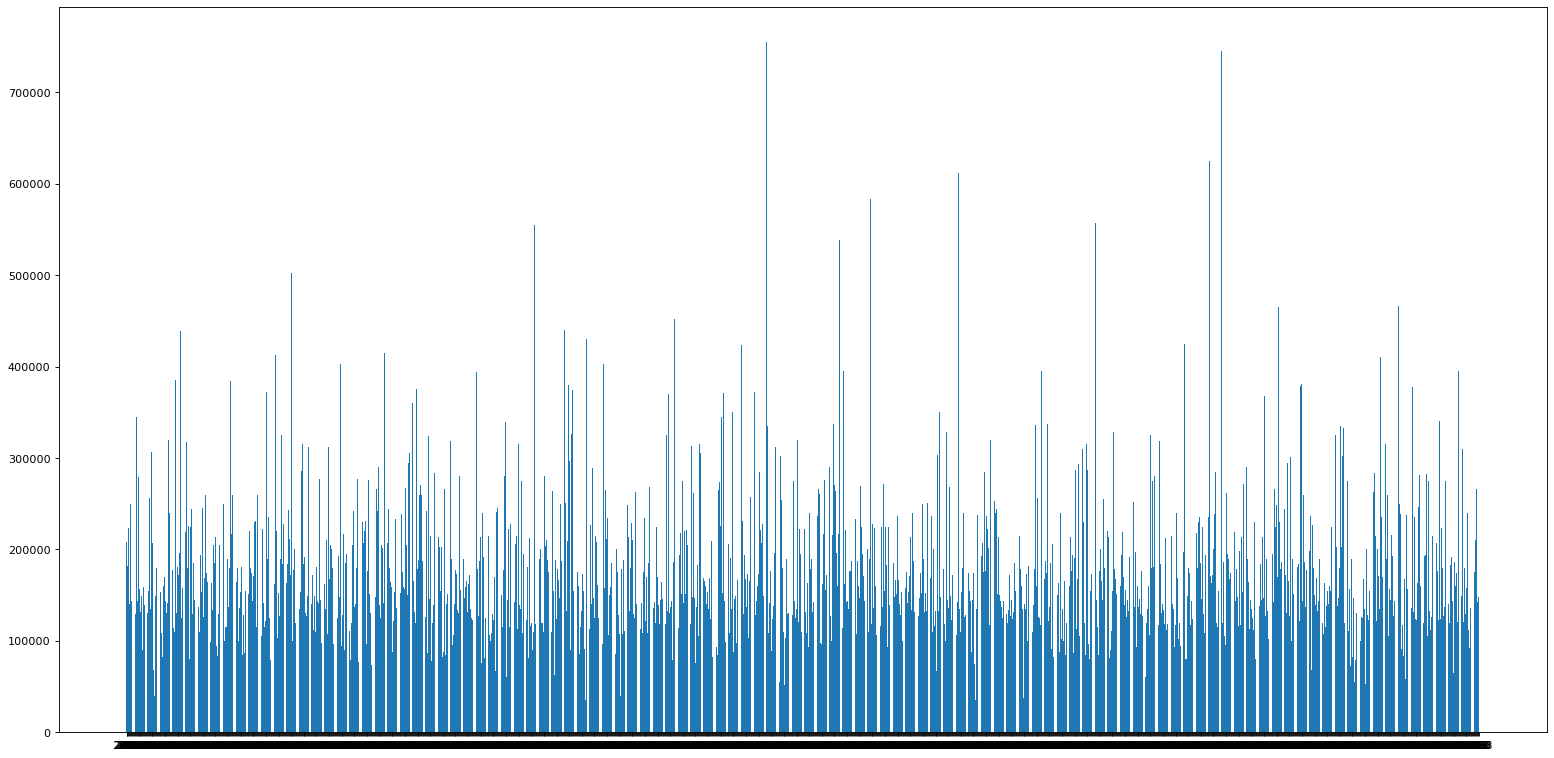

In [8]:
figure(figsize=(24, 12), dpi=80)
# Make a random dataset:
height = house['SalePrice']
bars = house['YrSold']
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Show graphic
plt.show()

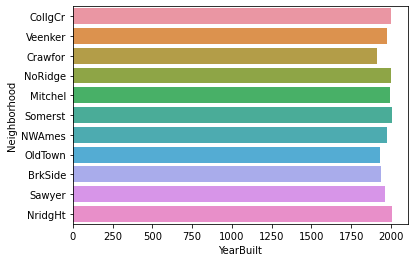

In [19]:
house = pd.read_csv('housing.csv',nrows=12)
sns.barplot(x='YearBuilt',y='Neighborhood',data=house,units=20)
plt.show()
#Here we have Neighborhood houses raging in what year the houses in that Neighborhood were built.
# But as we can see some were built in 1910 through 2000.

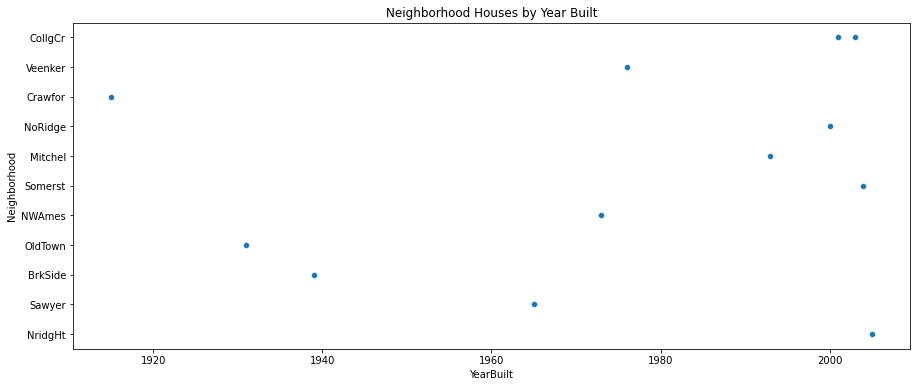

In [21]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YearBuilt', y='Neighborhood', data=house)
title = plt.title('Neighborhood Houses by Year Built')
# But here is a more insight exactly what year in the 1910-2000 they were being built.
# And as we can see in 1910 houses were built in one Neighborhoods. But we do not have a total of how many were being built in one Neighboorhood.
#Then it goes on to 2000s before the houses were being sold.

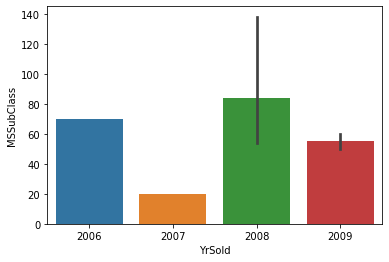

In [9]:
house = pd.read_csv('housing.csv',nrows=10)
sns.barplot(x='YrSold',y='MSSubClass',data=house,units=20)
plt.show()
#Judging from our plot we can see the Mssubclass houses(type of dwelling involved in the sale)
#As we can see in 2006 houses like a 2-STORY 1945 & OLDER were sold
# Then in 2007 houses like a 1-STORY 1946 & NEWER ALL STYLES were also sold.
# Then this bring me to 2008...houses involved in this were either a SPLIT OR MULTI-LEVEL or a 1-1/2 STORY PUD - ALL AGES
# Then lastly houses sold in 2009 were houses like a 2-STORY 1946 & NEWER

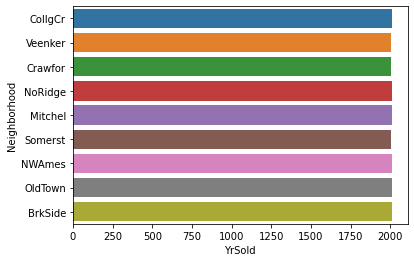

In [31]:
house = pd.read_csv('housing.csv',nrows=10)
sns.barplot(x='YrSold',y='Neighborhood',data=house,units=20)
plt.show()
# Now we can see when the houses were sold after it was all built.
#Here we have Neighborhood houses raging in what year the houses in that Neighborhood was sold. 
# But as we can see all of them were sold around 2000.

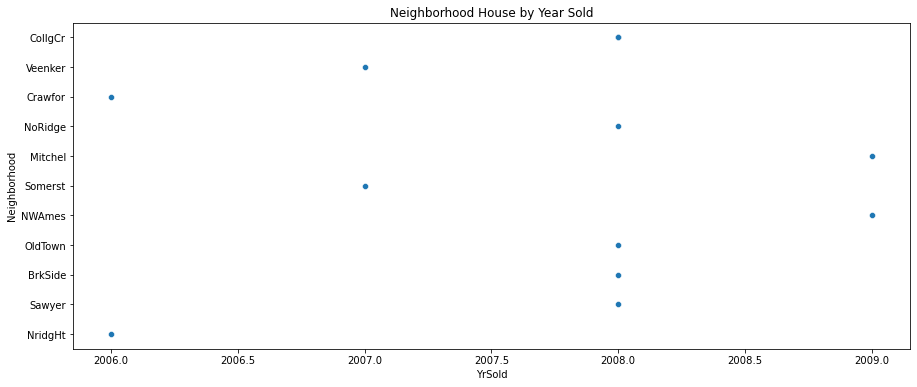

In [138]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='YrSold', y='Neighborhood', data=house)
title = plt.title('Neighborhood House by Year Sold')
# As we can see after all the houses were built...it was started being sold starting in 2006.
# But here is a more insight exactly what year in the 2000s they were sold
# And as we can see in 2006 in two Neighborhoods...some houses were sold. But since we do not have a total of how many were
#Were sold. We do not know the excalty were sold in those two Neighborhoods
# As we can see nothing was sold half a year into 2006 but then 2007...we can see again that houses were being bulit in two Neighborhood.
#Nothing again half a year in but then it picked up in 2008...houses were built in 5 neighborhood.
#Then in 2009 it went down to two neighborhood

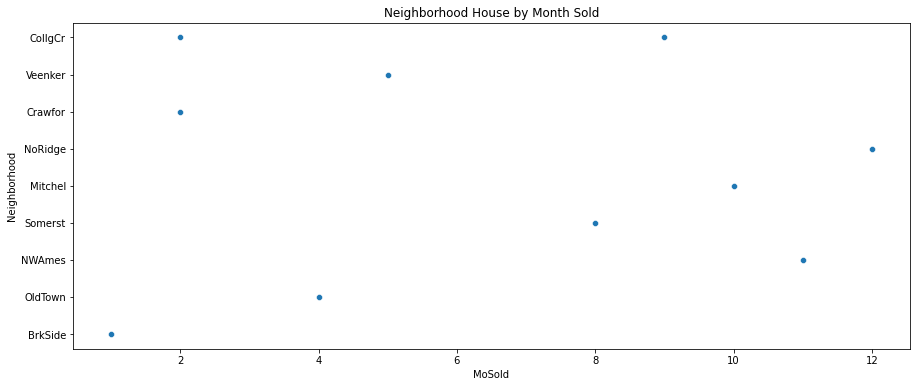

In [18]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='MoSold', y='Neighborhood', data=house)
title = plt.title('Neighborhood House by Month Sold')
#Here we have the month when those houses were being sold after it was built.
# So by the look of it...it looks like houses in each different Neighborhood were.
# Being sold each months but we do not know exaclty how many were being sold.

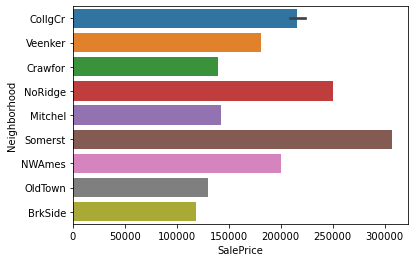

In [33]:
house = pd.read_csv('housing.csv',nrows=10)
sns.barplot(x='SalePrice',y='Neighborhood',data=house,units=20)
plt.show()
#As we can see that if we want a cheaper house in the neighborhood you go to the Brookside.
# But if you want a expensive home worth of 300,000 then you can go to the Somerset Neighborhood. 

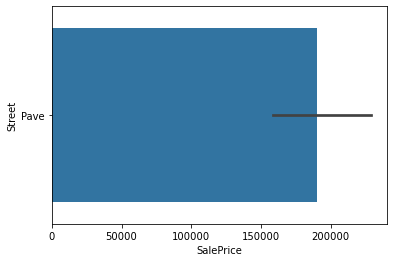

In [38]:
house = pd.read_csv('housing.csv',nrows=10)
sns.barplot(x='SalePrice',y='Street',data=house,units=20)
plt.show()
# For this one apparently the most used Type of road access to property is Pave and not Gravel.


In [23]:
x=('NAmes','CollgCr','OldTown','Edwards','Somerst','Gilbert')
y = np.random.randint(low=0, high=100, size=10)
y

array([46, 94, 19, 19, 13, 27, 49, 48, 36, 70])

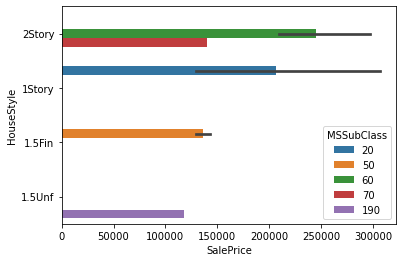

In [25]:
sns.barplot(y='HouseStyle',x='SalePrice', hue='MSSubClass',data=house);
#The hue right there is not the total of house it more like if the 1-STORY 1946 & NEWER ALL STYLES
# Is 2nd level finished or 2nd level unfinished

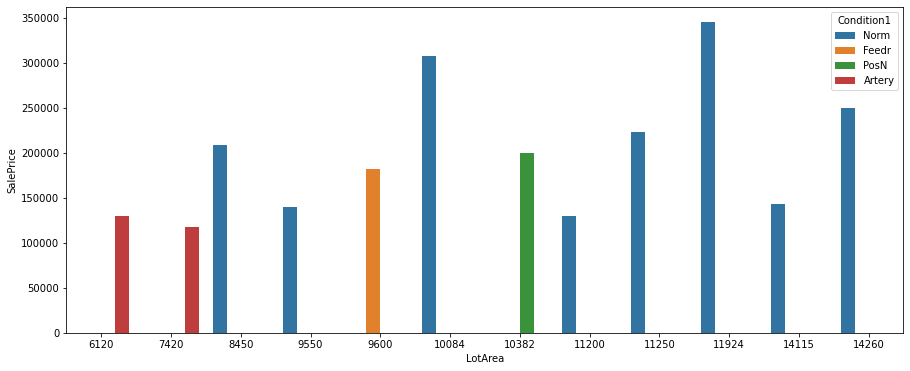

In [142]:
plt.figure(figsize=(15, 6))
sns.barplot(y='SalePrice',x='LotArea', hue='Condition1', data=house);
# Here we have the Sale Price conditon 1 LotArea to see Proximity to various conditions

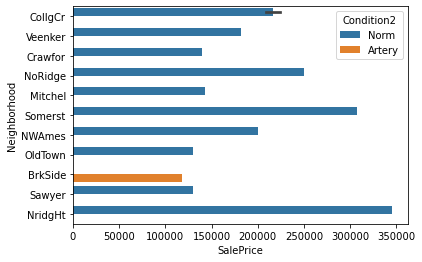

In [133]:
sns.barplot(y='Neighborhood',x='SalePrice', hue='Condition2',data=house);
# Here we have each Neighborhood Sale Price for conditon 2
# To see Proximity to various conditions (if more than one is present)
# And as you can see we only have two condtions out nine. Our plot shows that 
# Every neighborhood is normal but only BreekSide is Adjacent to arterial street

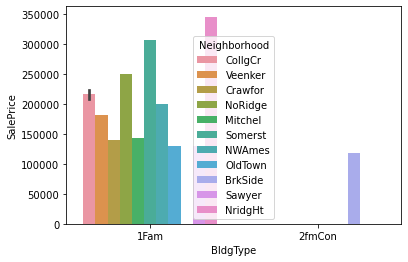

In [109]:
sns.barplot(y='SalePrice',x='BldgType', hue='Neighborhood',data=house);
# Right here in our plot as we can see it shwoing us each Neighborhood Building types dwelling with their Sale prices.
# And as we can see if you want a Single-family Detached house it like 325,00-350,00.
# Then you go to CollgCr,Veenker
# But if you want a Two-family Conversion; originally built as one-family dwelling then you got to NWAMes

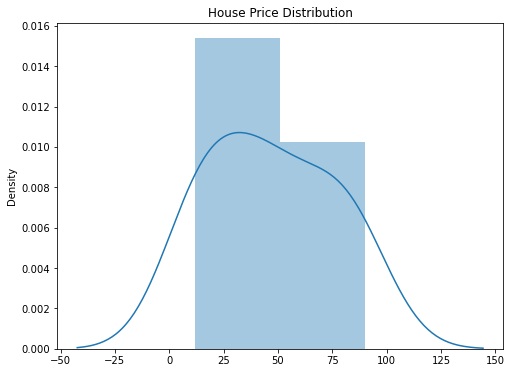

In [115]:
plt.figure(figsize=(8,6))
sns.distplot(y)
title = plt.title("House Price Distribution")

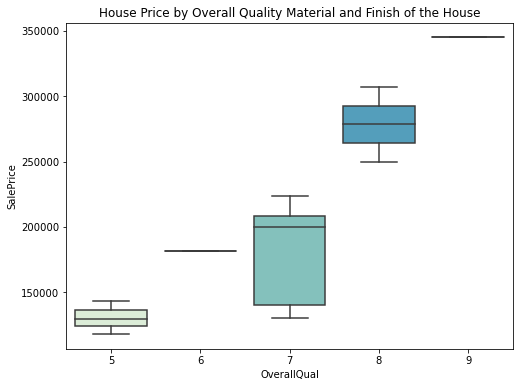

In [28]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='SalePrice', data=house, palette='GnBu')
title = plt.title('House Price by Overall Quality Material and Finish of the House')
# Our plot is pretty much stating if the pverall quality material is in the Excellent- Average. 
# Which means if you want a good quality house then pay 350,000...but if you want a avergae material quality house.
# Then you pay below 150,000.

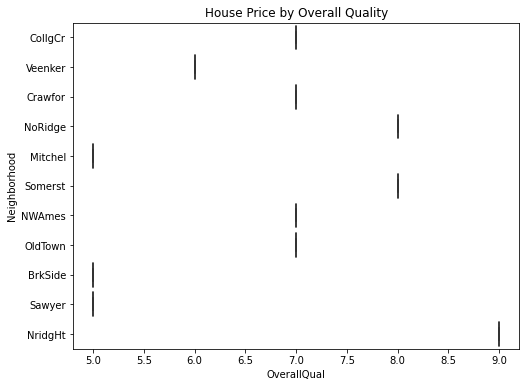

In [116]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallQual', y='Neighborhood', data=house, palette='GnBu')
title = plt.title('House Price by Overall Quality')
# We have this to get a more insight exactly which neighborhood has the best quality to move in.

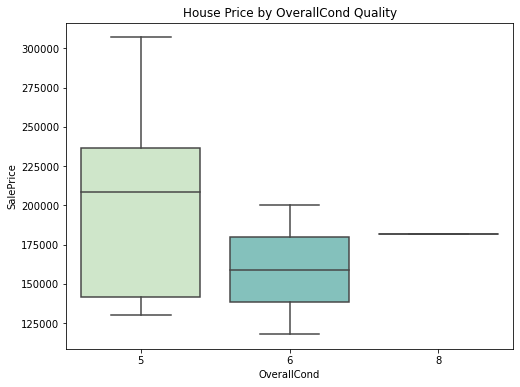

In [64]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='OverallCond', y='SalePrice', data=house, palette='GnBu')
title = plt.title('House Price by OverallCond Quality')

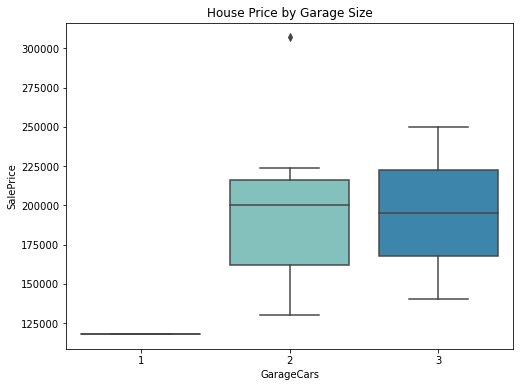

In [66]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='GarageCars', y='SalePrice', data=house, palette='GnBu')
title = plt.title('House Price by Garage Size')
#As you can see houses with garage which can hold 1 cars are cheaper than houses with 3-car garage.

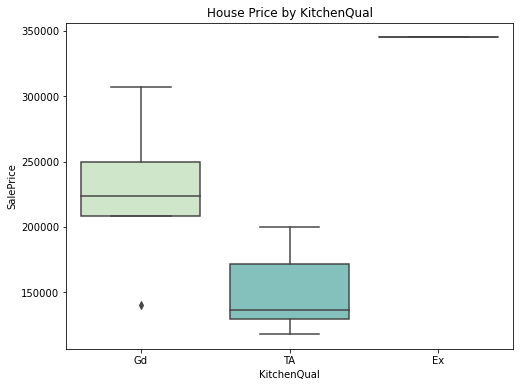

In [96]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='KitchenQual', y='SalePrice', data=house, palette='GnBu')
title = plt.title('House Price by KitchenQual')

In [ ]:
#Number of houses sold in a particular year
HouseYearSold = house['YrSold'].value_counts()
HouseYearSold

In [ ]:
#Average sales price for 2006
YearSold2006 = house[house['YrSold'] == 2006]
#YearSold2006
HouseYearSold2006 = YearSold2006['YrSold'].value_counts()
HouseYearSold2006

In [ ]:
YearSold2006['SalePrice'].mean()

In [ ]:
#Average sales price for 2007
YearSold2007 = house[house['YrSold'] == 2007]
#YearSold2007
HouseYearSold2007 = YearSold2007['YrSold'].value_counts()
HouseYearSold2007

In [ ]:
YearSold2007['SalePrice'].mean()

In [ ]:
#Average sales price for 2008
YearSold2008 = house[house['YrSold'] == 2008]
#YearSold2008
HouseYearSold2008 = YearSold2008['YrSold'].value_counts()
HouseYearSold2008

In [ ]:
YearSold2008['SalePrice'].mean()

In [ ]:
#Average sales price for 2009
YearSold2009 = house[house['YrSold'] == 2009]
#YearSold2009
HouseYearSold2009 = YearSold2009['YrSold'].value_counts()
HouseYearSold2009

In [ ]:
YearSold2009['SalePrice'].mean()

In [ ]:
#Average sales price for 2010
YearSold2010 = house[house['YrSold'] == 2010]
#YearSold2010
HouseYearSold2010 = YearSold2010['YrSold'].value_counts()
HouseYearSold2010

In [ ]:
YearSold2010['SalePrice'].mean()

In [ ]:
#Number of houses sold in a particular area of Ames, Iowa
HouseArea = house['Neighborhood'].value_counts()
HouseArea

In [ ]:
#Average sales price for Top 6 Areas

YearSold2010 = house[house['YrSold'] == 2010]
#YearSold2010
HouseYearSold2010 = YearSold2010['YrSold'].value_counts()
HouseYearSold2010

In [ ]:
AreaNAmes = house[house['Neighborhood'] == 'NAmes']
AreaCollgCr = house[house['Neighborhood'] == 'CollgCr']
AreaOldTown = house[house['Neighborhood'] == 'OldTown']
AreaEdwards  = house[house['Neighborhood'] == 'Edwards']
AreaSomerst  = house[house['Neighborhood'] == 'Somerst']
AreaGilbert  = house[house['Neighborhood'] == 'Gilbert']

In [ ]:
AreaNAmes['SalePrice'].mean()

In [ ]:
AreaCollgCr['SalePrice'].mean()

In [ ]:
AreaOldTown['SalePrice'].mean()

In [ ]:
AreaEdwards['SalePrice'].mean()

In [ ]:
AreaSomerst['SalePrice'].mean()

In [ ]:
AreaGilbert['SalePrice'].mean()

In [ ]:
HouseYearBuilt = house['YearBuilt'].value_counts()
HouseYearBuilt

In [ ]:
Sold2006NewExisting = house[house['YearBuilt'] == 2006]
Sold2006NewExistings = Sold2006NewExisting[Sold2006NewExisting['YrSold'] == 2006]
Sold2006NewExistings

In [ ]:
Sold2007NewExisting = house[house['YearBuilt'] == 2007]
Sold2007NewExistings = Sold2007NewExisting[Sold2007NewExisting['YrSold'] == 2007]
Sold2007NewExistings

In [ ]:
Sold2008NewExisting = house[house['YearBuilt'] == 2008]
Sold2008NewExistings = Sold2008NewExisting[Sold2008NewExisting['YrSold'] == 2008]
Sold2008NewExistings

In [ ]:
Sold2009NewExisting = house[house['YearBuilt'] == 2009]
Sold2009NewExistings = Sold2009NewExisting[Sold2009NewExisting['YrSold'] == 2009]
Sold2009NewExistings

In [ ]:
Sold2010NewExisting = house[house['YearBuilt'] == 2010]
Sold2010NewExistings = Sold2010NewExisting[Sold2010NewExisting['YrSold'] == 2010]
Sold2010NewExistings

In [ ]:
#building type
Sold2006BldgType = Sold2006NewExisting['BldgType'].value_counts()
Sold2006BldgType

In [ ]:
Sold2007BldgType = Sold2007NewExisting['BldgType'].value_counts()
Sold2007BldgType

In [ ]:
Sold2008BldgType = Sold2008NewExisting['BldgType'].value_counts()
Sold2008BldgType

In [ ]:
Sold2009BldgType = Sold2009NewExisting['BldgType'].value_counts()
Sold2009BldgType

In [ ]:
Sold2010BldgType = Sold2010NewExisting['BldgType'].value_counts()
Sold2010BldgType